In [67]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

Text(0.5, 1.0, 'High resolution phantom')

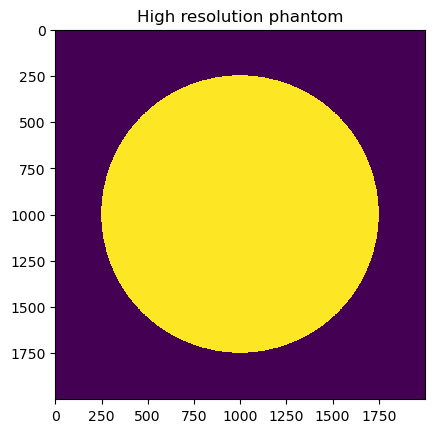

In [10]:
N = 2000
xx = np.linspace(-1,1,N)
x,y = np.meshgrid(xx,xx)
R=np.sqrt(x**2+y**2)
disk = R<0.75
plt.imshow(disk,interpolation='none')
plt.title('High resolution phantom')

In [43]:
def bin_pixels(im, N):
    # Ensure the image dimensions are multiples of N by cropping if needed
    m, n = im.shape
    m_crop = (m // N) * N
    n_crop = (n // N) * N
    im_cropped = im[:m_crop, :n_crop]
    
    # Reshape and average
    return im_cropped.reshape(m_crop//N, N, n_crop//N, N).mean(axis=(1, 3))

In [44]:
img = bin_pixels(disk,step)

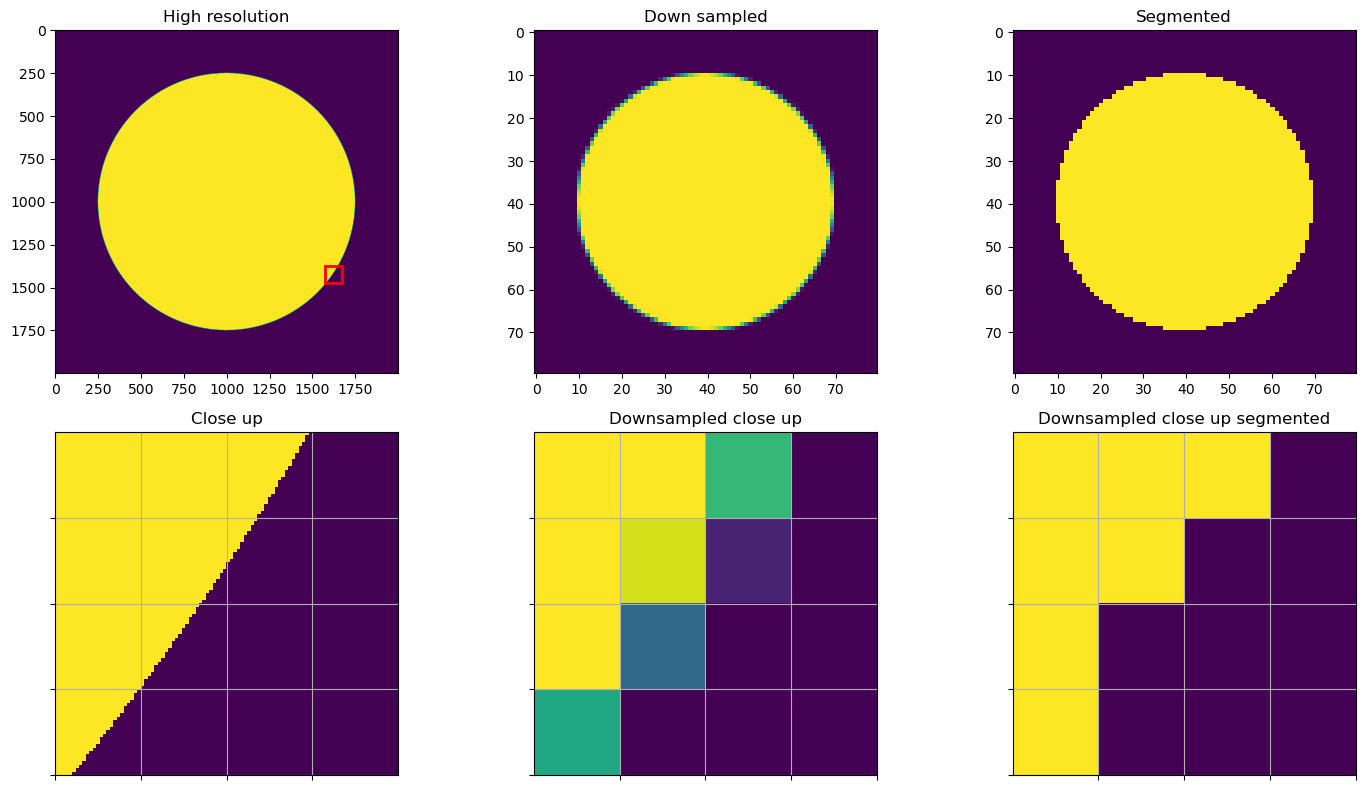

In [70]:
N = 2000
xx = np.linspace(-1,1,N)
x,y = np.meshgrid(xx,xx)
R=np.sqrt(x**2+y**2)
disk = R<0.75

fig,ax = plt.subplots(2,3,figsize=(15,8))

size = 100
step = 25
pos = [1375,1575]
ax=ax.ravel()
ax[0].imshow(disk)
ax[0].set_title('High resolution')
rect = patches.Rectangle((pos[1], pos[0]), size, size, linewidth=2, edgecolor='red', facecolor='none')

# Add the rectangle to the axes
ax[0].add_patch(rect)


# ax[0].set(xticks=np.arange(0,N,step),yticks=np.arange(0,N,step),xticklabels=[],yticklabels=[]);
# ax[0].grid()

ax[1].imshow(img)
ax[1].set_title('Down sampled')


ax[2].imshow(img>0.5)
ax[2].set_title('Segmented')


ax[3].imshow(disk[pos[0]:(pos[0]+size),pos[1]:(pos[1]+size)],extent=[pos[1],pos[1]+size,pos[0],pos[0]+size], interpolation='none')
ax[3].set(xticks=np.arange(pos[1],pos[1]+size,step),yticks=np.arange(pos[0],pos[0]+size,step),xticklabels=[],yticklabels=[]);
ax[3].grid()
ax[3].set_title('Close up')

ax[4].imshow(img[(pos[0]//step):(pos[0]//step + size//step), (pos[1]//step):(pos[1]//step + size//step)])
ax[4].set(xticks=np.arange(4)+0.5,yticks=np.arange(4)+0.5,xticklabels=[],yticklabels=[]);
ax[4].grid()
ax[4].set_title('Downsampled close up')

ax[5].imshow(img[(pos[0]//step):(pos[0]//step + size//step), (pos[1]//step):(pos[1]//step + size//step)]>0.5)
ax[5].set(xticks=np.arange(4)+0.5,yticks=np.arange(4)+0.5,xticklabels=[],yticklabels=[]);
ax[5].grid()
ax[5].set_title('Downsampled close up segmented');

plt.tight_layout()
plt.savefig('downsampling.png', dpi=300)